# imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import holidays
import seaborn as sns
import numpy as np
import mplcursors
import plotly.express as px
import numpy as np

# Data upload

In [4]:
df=pd.read_csv('../../raw_data/df_NAN.csv')
channels_spend = ["tt_costs", "fb_costs", "google_costs"]
df["Total_Spend"] = df[channels_spend].sum(axis=1)
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [5]:
df['ROI']= df['total_sales']/df["Total_Spend"]

In [6]:
df['fb_cpc']=df['fb_costs']/df['fb_clicks']
df['tt_cpc']=df['tt_costs']/df['tt_clicks']
df['google_cpc']=df['google_costs']/df['google_clicks']

In [7]:
df['fb_cpm']=(df['fb_costs']/df['fb_impressions'])*1000
df['tt_cpm']=(df['tt_costs']/df['tt_impressions'])*1000
df['google_cpm']=(df['google_costs']/df['google_impressions'])*1000

In [8]:
df.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825,1.992326,NaN,0.05850,7.099724,NaN,30.000000
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625,1.668667,NaN,0.12000,7.575666,NaN,60.000000
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651,1.927054,NaN,0.12000,7.525960,NaN,60.000000
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472,2.168487,NaN,0.01400,6.888130,NaN,5.384615
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824,1.813169,NaN,0.02375,7.159303,NaN,11.176471


In [9]:
# Convert 'Day' column to datetime type
df['Day'] = pd.to_datetime(df['Day'])

# Set 'Day' column as index
df.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(df.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
df_monthly = df.resample('M').sum()
df_monthly

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10',
               ...
               '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24'],
              dtype='datetime64[ns]', name='Day', length=785, freq=None)


,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm
Day,,,,,,,,,,,,,,,,,,,
2021-07-31,696,28621.07,18239.87,3229060.0,13159.0,57.15,1329.0,522.0,0.00,0.0,0.0,18297.02,51.182511,48.333168,0.000000,3.017900,188.151881,0.000000,1.238680e+03
2021-08-31,869,33834.46,34009.52,5334003.0,22288.0,71.10,1533.0,654.0,0.00,0.0,0.0,34080.62,63.876974,44.623419,0.000000,3.353014,187.044396,0.000000,1.447707e+03
2021-09-30,339,12793.67,10420.81,1011118.0,4685.0,67.67,728.0,436.0,0.00,0.0,0.0,10488.48,30.550885,34.087717,0.000000,4.226361,164.283266,0.000000,2.588712e+03
2021-10-31,1072,29762.41,32494.04,4983518.0,17959.0,47.14,1269.0,650.0,0.00,0.0,0.0,32541.18,28.924454,60.167220,0.000000,2.232655,207.999773,0.000000,1.122004e+03
2021-11-30,561,17073.13,14127.43,2075497.0,6794.0,34.29,1088.0,573.0,0.00,0.0,0.0,14161.72,136.231276,NaN,0.000000,1.959583,294.488718,0.000000,1.064439e+03
2021-12-31,104,1822.59,290.60,69150.0,40.0,9.99,346.0,122.0,0.00,0.0,0.0,300.59,393.141234,NaN,0.000000,2.786262,74.934780,0.000000,1.104765e+03
2022-01-31,1184,37700.35,22286.03,4330075.0,20687.0,137.55,3267.0,1185.0,0.00,0.0,0.0,22423.58,80.339241,NaN,0.000000,2.879809,152.585088,0.000000,1.085592e+03
2022-02-28,1322,44525.78,19673.59,3578402.0,14132.0,258.75,6085.0,2052.0,0.00,0.0,0.0,19932.34,61.395400,39.619248,0.000000,3.499011,155.217960,0.000000,1.221443e+03
2022-03-31,1280,43400.96,15038.04,3020741.0,9038.0,847.66,4925.0,2647.0,0.00,0.0,0.0,15885.70,88.523333,51.577163,0.000000,8.753898,156.036657,0.000000,7.708340e+04


# #  plots for Facebook 


[<matplotlib.lines.Line2D object at 0x1451024d0>, <matplotlib.lines.Line2D object at 0x14515a7a0>, <matplotlib.lines.Line2D object at 0x14515a410>]
['Costs', 'Clicks', 'Impressions']


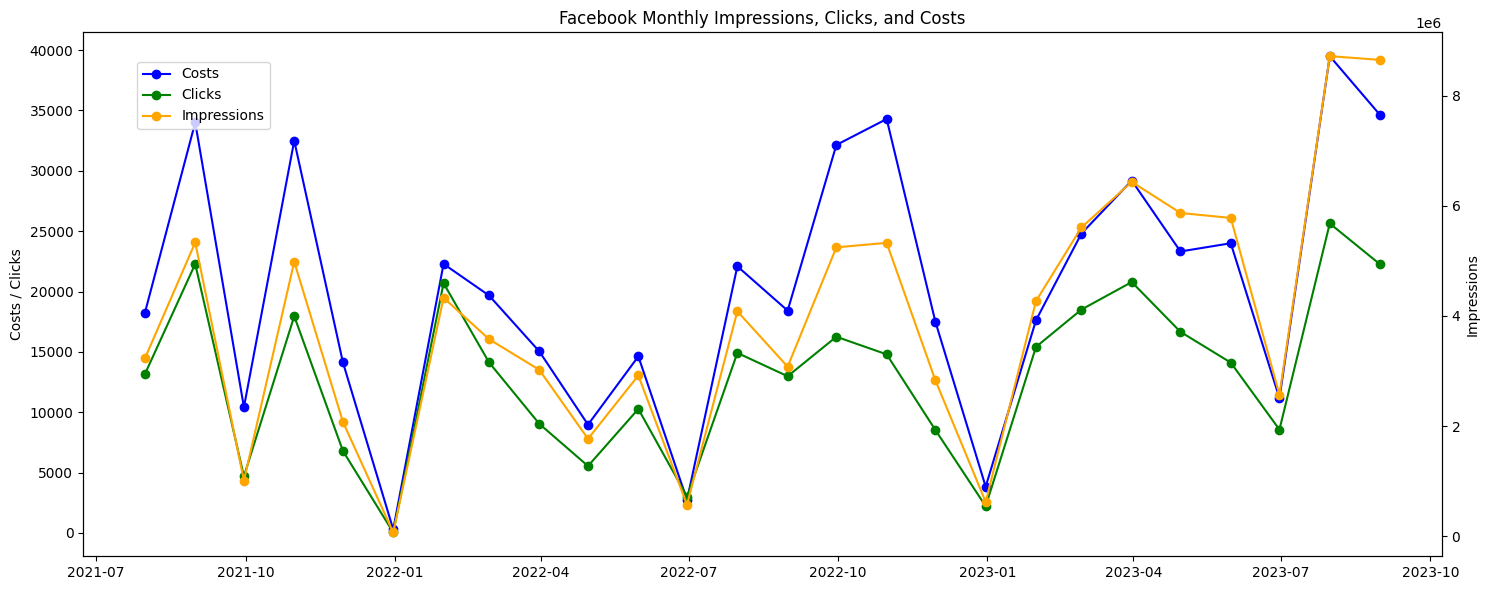

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['fb_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['fb_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['fb_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Facebook Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
df.columns

Index(['orders', 'total_sales', 'fb_costs', 'fb_impressions', 'fb_clicks',
       'google_costs', 'google_impressions', 'google_clicks', 'tt_costs',
       'tt_impressions', 'tt_clicks', 'Total_Spend', 'ROI', 'fb_cpc', 'tt_cpc',
       'google_cpc', 'fb_cpm', 'tt_cpm', 'google_cpm'],
      dtype='object')

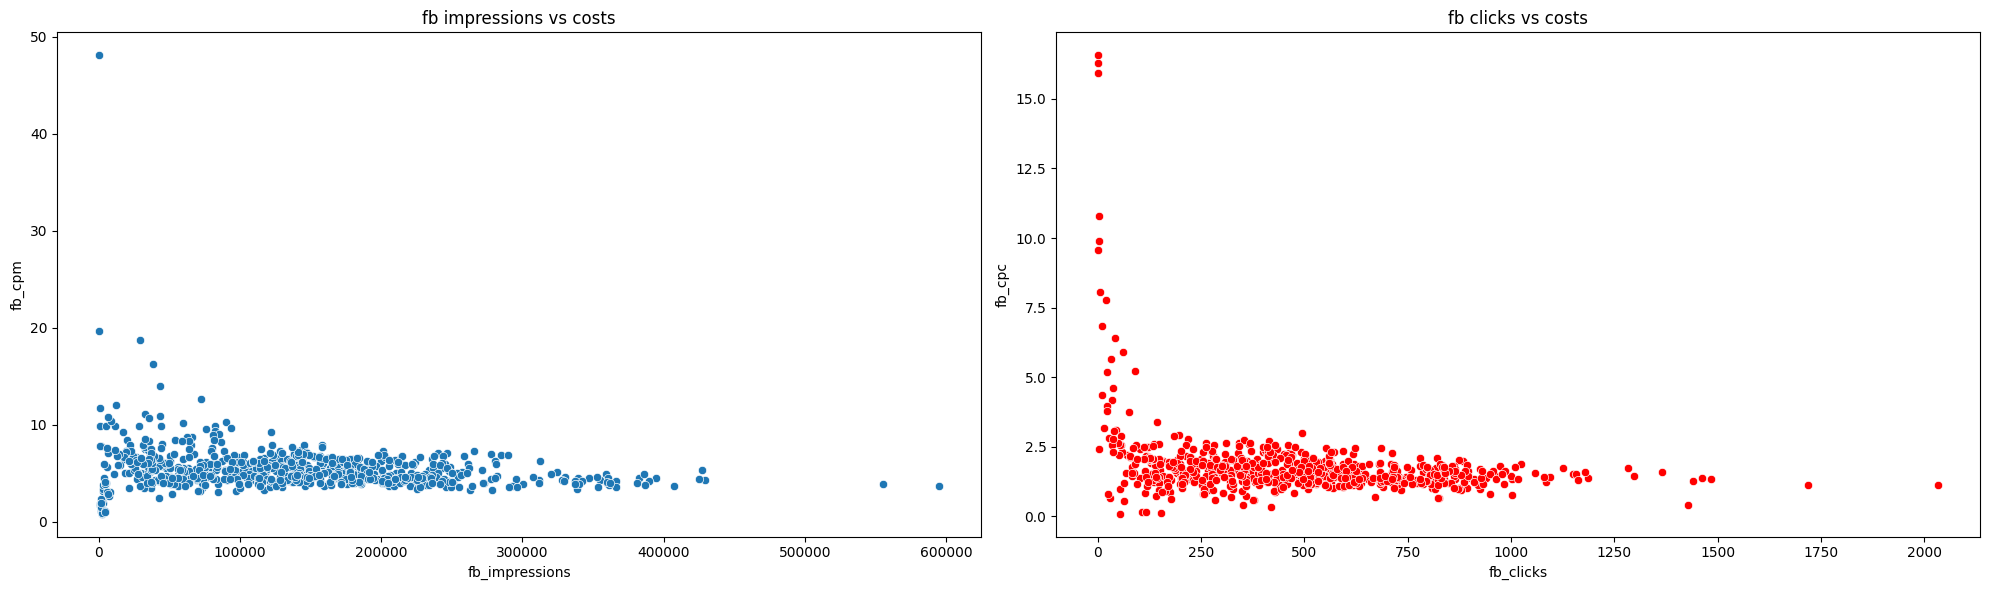

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="fb_impressions", y="fb_cpm")
plt.xlabel('fb_impressions')
plt.ylabel('fb_cpm')
plt.title('fb impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="fb_clicks", y="fb_cpc", color='red')
plt.xlabel('fb_clicks')
plt.ylabel('fb_cpc')
plt.title('fb clicks vs costs')

plt.tight_layout()
plt.show()

#  plots for Tiktok


[<matplotlib.lines.Line2D object at 0x1453a1fc0>, <matplotlib.lines.Line2D object at 0x1453c63b0>, <matplotlib.lines.Line2D object at 0x1453c6020>]
['Costs', 'Clicks', 'Impressions']


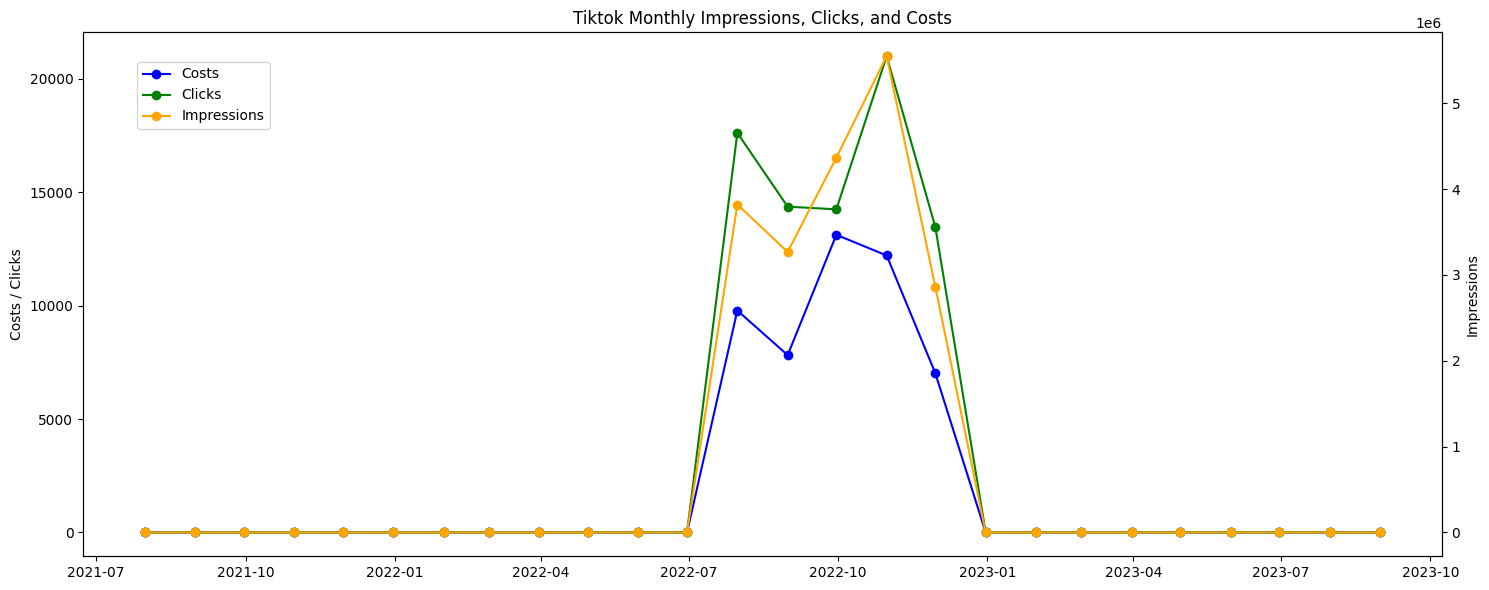

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['tt_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['tt_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['tt_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Tiktok Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

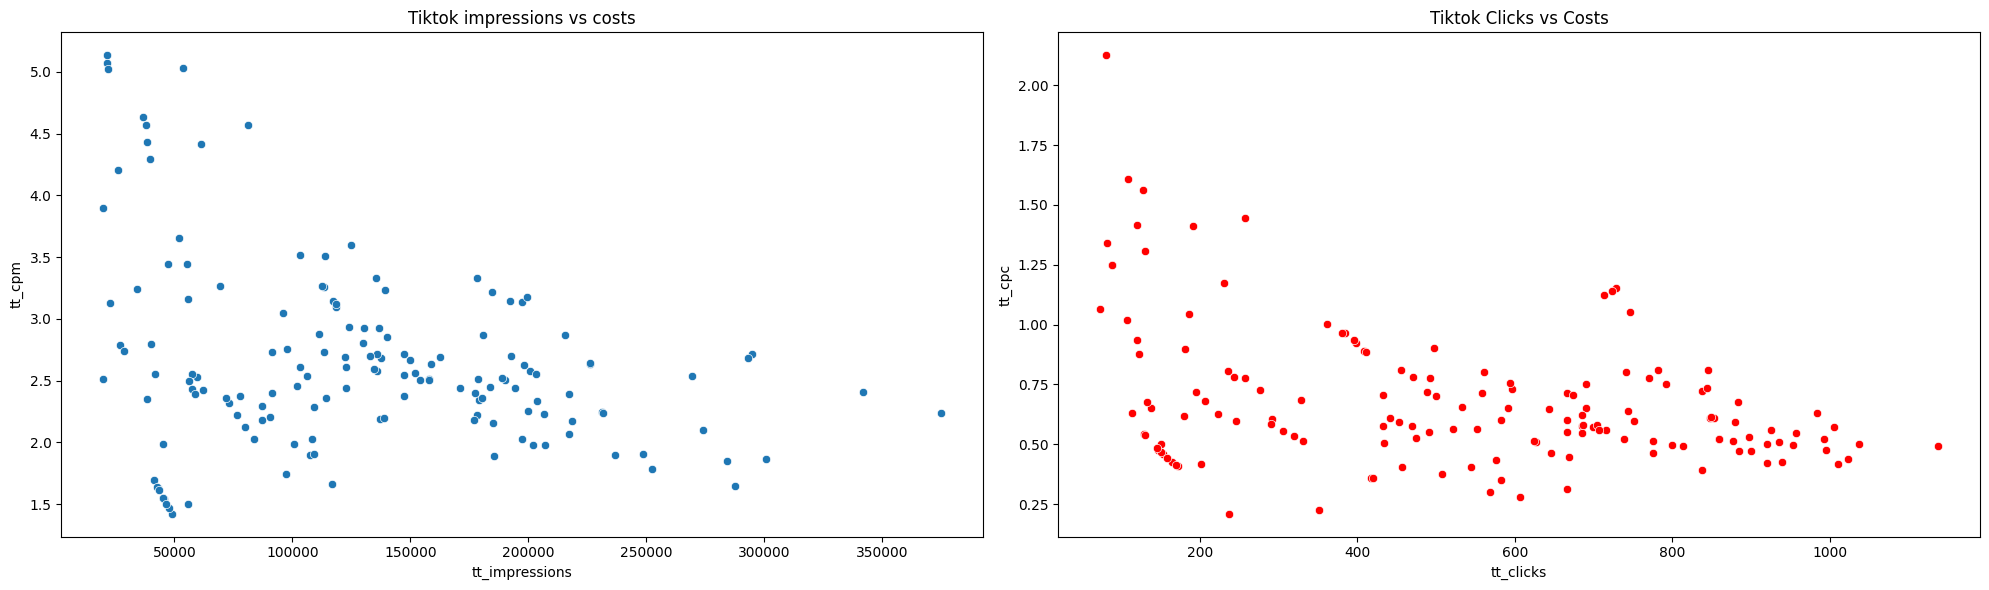

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="tt_impressions", y="tt_cpm")
plt.xlabel('tt_impressions')
plt.ylabel('tt_cpm')
plt.title('Tiktok impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="tt_clicks", y="tt_cpc", color='red')
plt.xlabel('tt_clicks')
plt.ylabel('tt_cpc')
plt.title('Tiktok Clicks vs Costs')

plt.tight_layout()
plt.show()

#  plots for Google

[<matplotlib.lines.Line2D object at 0x145750880>, <matplotlib.lines.Line2D object at 0x145784d30>, <matplotlib.lines.Line2D object at 0x1457849a0>]
['Costs', 'Clicks', 'Impressions']


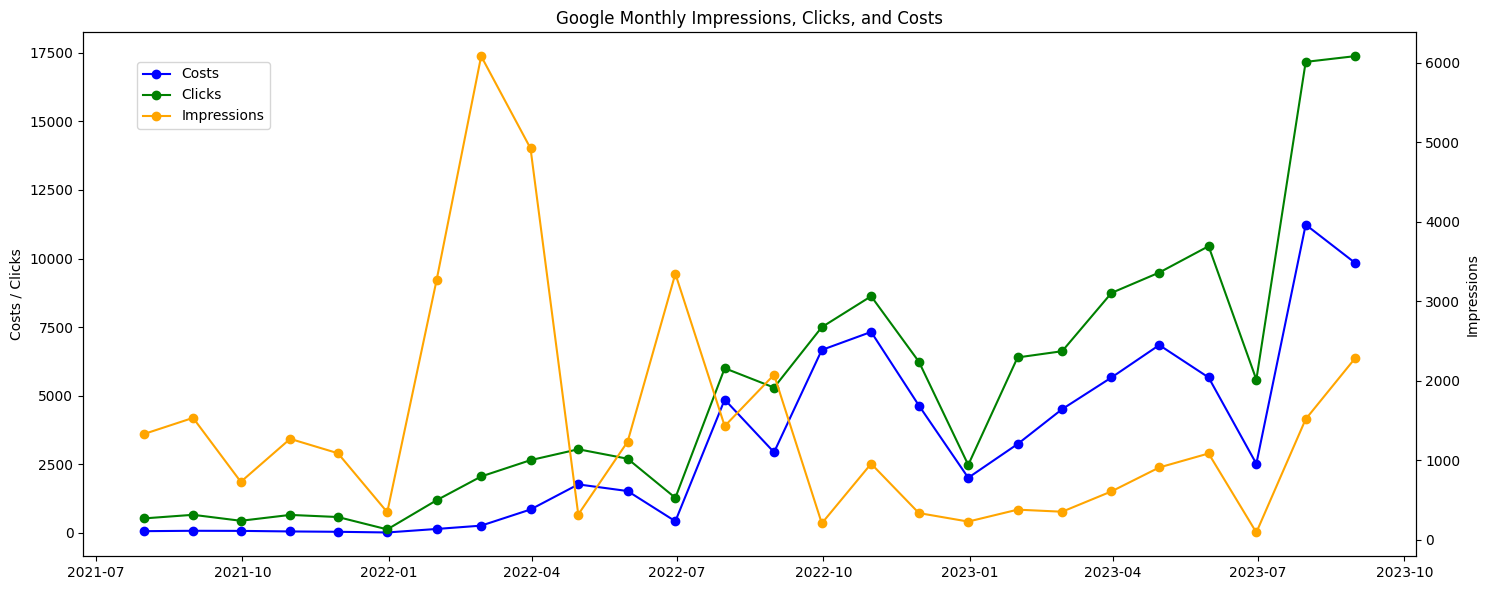

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['google_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['google_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['google_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Google Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

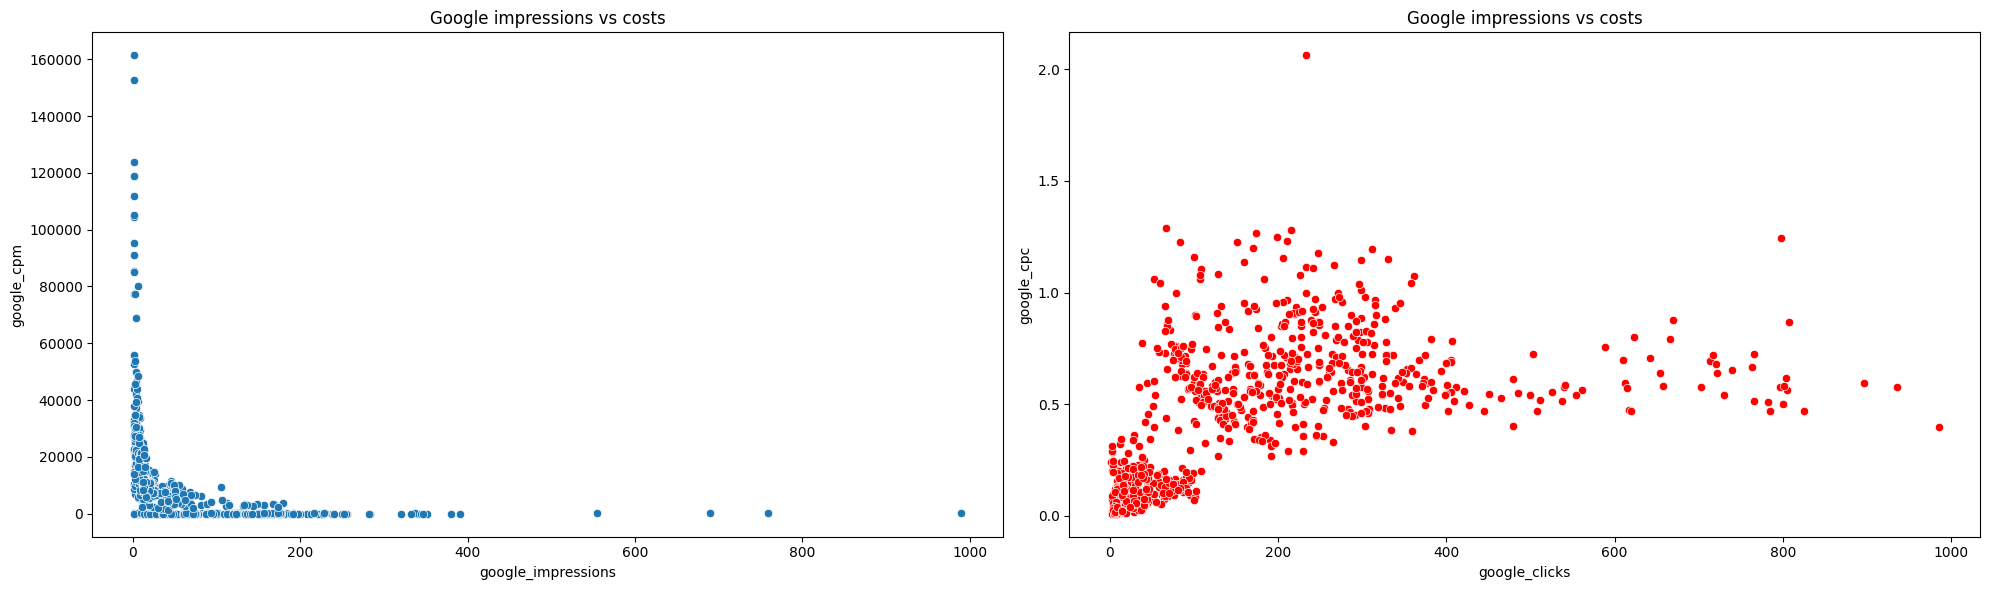

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="google_impressions", y="google_cpm")
plt.xlabel('google_impressions')
plt.ylabel('google_cpm')
plt.title('Google impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="google_clicks", y="google_cpc", color='red')
plt.xlabel('google_clicks')
plt.ylabel('google_cpc')
plt.title('Google impressions vs costs')

plt.tight_layout()
plt.show()

# General Plots  

## Sales and Spend Data Over Time

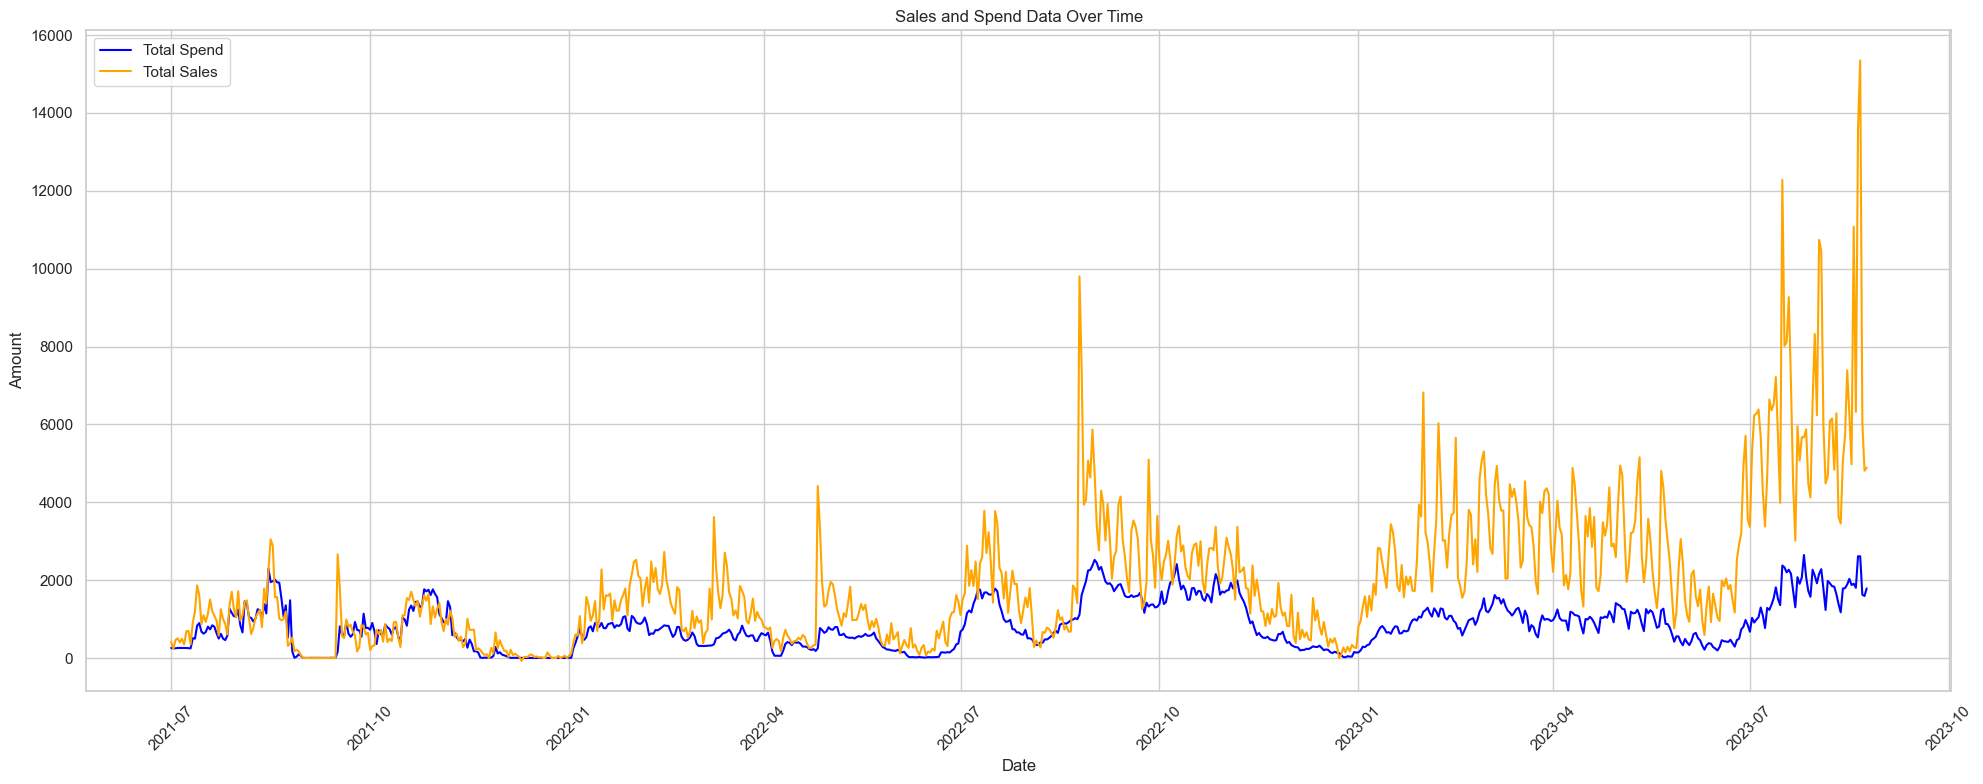

In [17]:
plt.figure(figsize=(20, 8)) 
sns.set(style="whitegrid")

plt.plot(df.index, df['Total_Spend'], linestyle='-', color='blue', label='Total Spend') 
plt.plot(df.index, df['total_sales'], linestyle='-', color='orange', label='Total Sales') 

plt.title('Sales and Spend Data Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.xticks(rotation=45)
plt.legend()  # Adding legend

plt.tight_layout()
plt.show()

 ## CPC vs. Total Sales and CPM vs. Total Sales

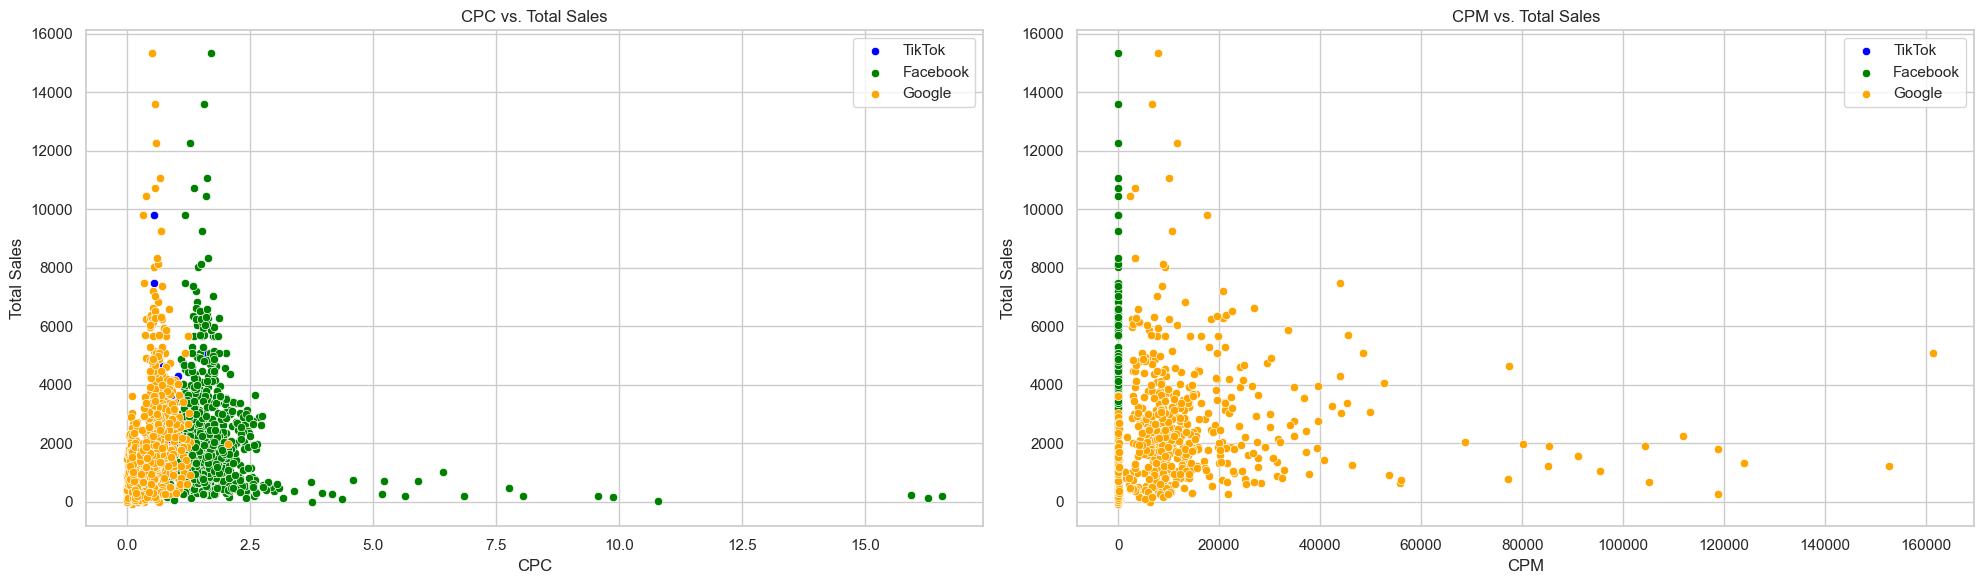

In [18]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_cpc', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_cpc', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_cpc', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('CPC vs. Total Sales')
plt.xlabel('CPC')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_cpm', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_cpm', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_cpm', y='total_sales', data=df, label='Google', color='orange')

# Set plot title and labels
plt.title('CPM vs. Total Sales')
plt.xlabel('CPM')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

## Clicks vs. Total Sales and Impressions vs. Total Sales

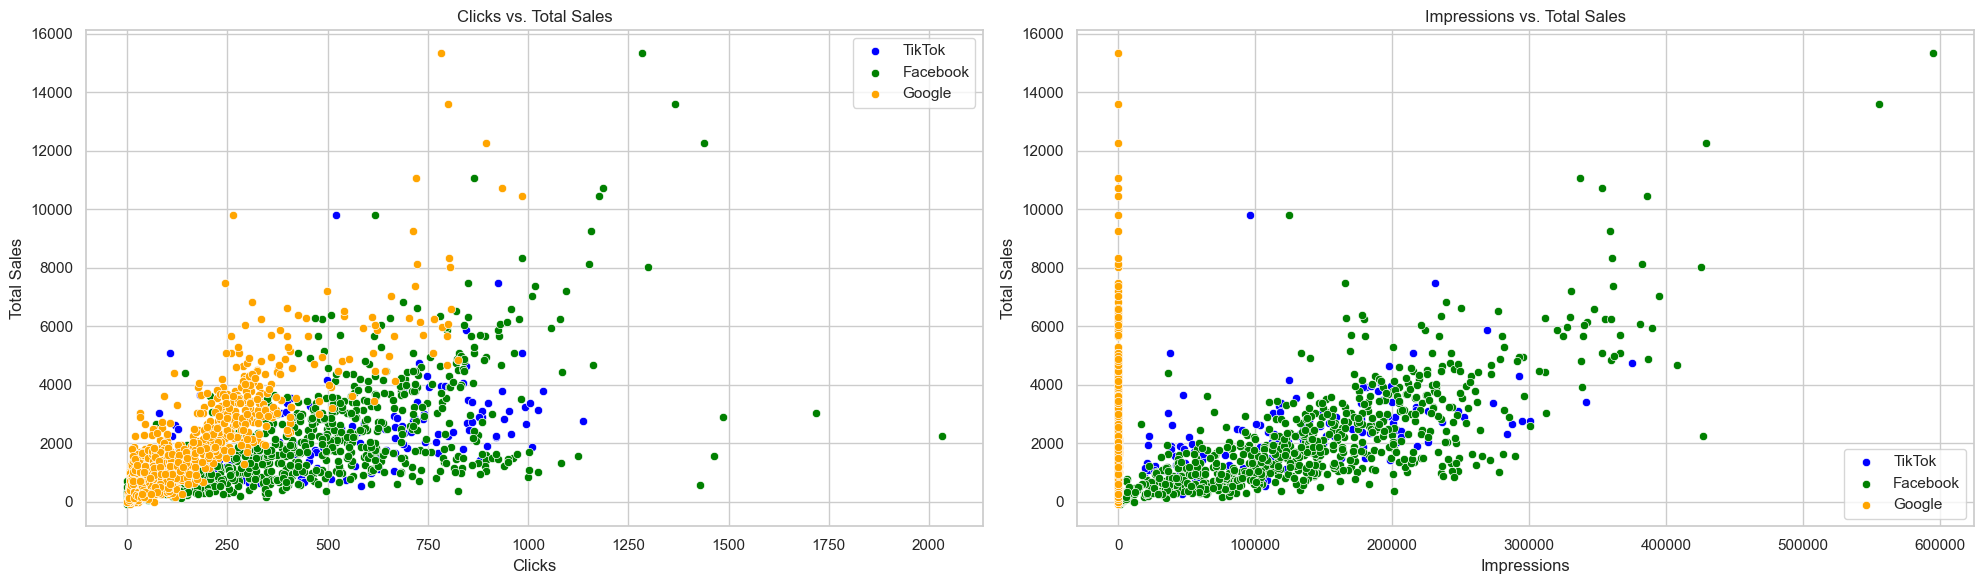

In [19]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_clicks', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_clicks', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_clicks', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Clicks vs. Total Sales')
plt.xlabel('Clicks')
plt.ylabel('Total Sales')
# Show legend
plt.legend()


plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_impressions', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_impressions', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_impressions', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Impressions vs. Total Sales')
plt.xlabel('Impressions')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

## Average ROI by Weekday

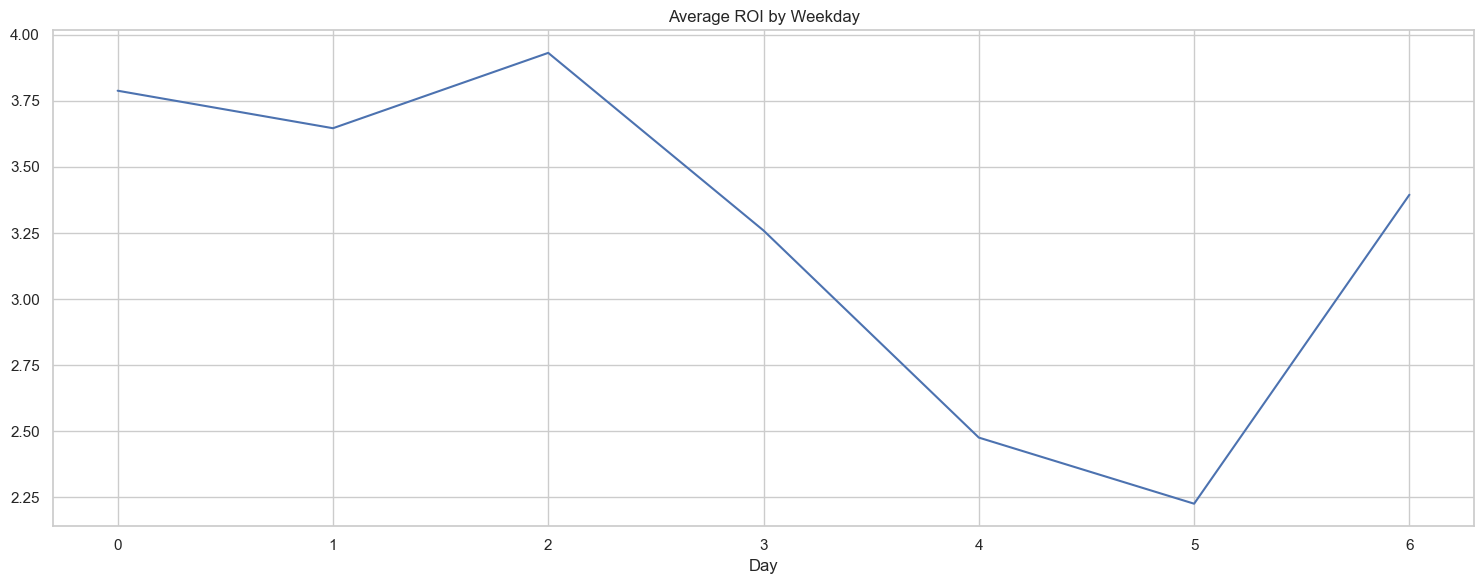

In [20]:
plt.figure(figsize=(15,6))

# Shows that on day 4 & 5 (fri, sat) of the week we have less ROI on average
df.groupby(df.index.dayofweek)["ROI"].mean().plot()
plt.title("Average ROI by Weekday")

plt.tight_layout()  # Improves subplot spacing
plt.show()

In [30]:
df.groupby(df.index.dayofweek)["ROI"].mean()

Day
0    3.788682
1    3.646744
2    3.931873
3    3.259683
4    2.476015
5    2.225811
6    3.395049
Name: ROI, dtype: float64